<a href="https://colab.research.google.com/github/almendruki/data_science/blob/main/09_Tareas_Proyectos/Tarea_2(Kevin2%20con%20comentarios).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Descarga de todos los datasets**

In [ ]:
import kagglehub

# Downoad latest version
path1 = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path1)

Path to dataset files: /kaggle/input/fashionmnist


In [ ]:
import kagglehub

# Downoad latest version
path2 = kagglehub.dataset_download("uciml/human-activity-recognition-with-smartphones")

print("Path to dataset files:", path2)

Path to dataset files: /kaggle/input/human-activity-recognition-with-smartphones


In [ ]:
import kagglehub

# Download latest version
path3 = kagglehub.dataset_download("rajyellow46/wine-quality")

print("Path to dataset files:", path3)

Path to dataset files: /kaggle/input/wine-quality


In [ ]:
import kagglehub

# Download latest version
path4 = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path4)

Path to dataset files: /kaggle/input/creditcardfraud


In [ ]:
import kagglehub

# Download latest version
path5 = kagglehub.dataset_download("ujjwalchowdhury/energy-efficiency-data-set")

print("Path to dataset files:", path5)

Path to dataset files: /kaggle/input/energy-efficiency-data-set


# **Parte 1 - Reducción de dimensionalidad (solo pre-procesamiento)**

# **Ejercicio 1: Fashion MNIST**

El objetivo del primer ejercicio es realizar una reducción de dimensionalidad a través de PCA conservando el 95% de la varianza a un dataset. El dataset que se ocupará es Fashion MNIST el cual posee 60.000 ejemplos de prendas de vestir codificadas en 28x28 pixeles en escalas de grises.

Partiremos cargando de las librerías necesarias para la reducción de dimensionalidad y visualización.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Carguemos el dataset y hagamos una visualización de sus primeras 5 filas para ver su estructura y si es necesario realizar algún arreglo.

In [ ]:
df1 = pd.read_csv(path1 + '/fashion-mnist_train.csv')
print(df1.head())
df1.shape

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         

(60000, 785)

Ahora veamos si el dataset posee datos nulos para corregirlos.

In [ ]:
nulos = df1.isnull().any().any()
print(f"¿Hay algún valor nulo en el DataFrame? {nulos}")

¿Hay algún valor nulo en el DataFrame? False


Procedemos a eliminar la primera columna del dataset, ya que esta corresponde a una codificacion para saber el tipo de vestimenta y no aporta información en la reducción de los datos.  

In [ ]:
df1 = df1.drop(columns=['label'])

Lo primero que debemos hacer antes de realizar la reduccion de dimensionalidad a través de PCA es estandarizar los datos para que así las variables con una dimensionalidad alta no dominen el análisis y las de baja dimensionalidad se vean representadas.

In [ ]:
scaler = StandardScaler()
X_scaled_1 = scaler.fit_transform(df1)

Ahora podemos aplicar PCA. En este caso buscamos conservar el 95% de la varianza de los datos.

In [ ]:
pca = PCA(n_components=0.95)
X_pca_1 = pca.fit_transform(X_scaled_1)

In [ ]:
X_pca_1.shape

(60000, 256)

Notemos que luego de aplicar PCA las imagenes se ven representadas a través de 256 componentes que explican el 95% de la varianza de los datos.

Procedamos a visualizar las componentes principales de la reducción realizada por PCA. Estas permiten entender como las caracteristicas originales se combinan linealmente para formar los nuevos componentes reducidos.

In [ ]:
pca.components_

array([[ 0.00031395,  0.00088127,  0.00149325, ...,  0.0064913 ,
         0.0014661 ,  0.0006676 ],
       [ 0.00017932,  0.0014502 ,  0.00115874, ...,  0.0140834 ,
         0.00961568,  0.00409087],
       [ 0.00011493,  0.00085995,  0.00188652, ...,  0.00893996,
        -0.00232472, -0.00124449],
       ...,
       [-0.02489535,  0.04248402, -0.00491171, ..., -0.01958045,
         0.05528764, -0.05775233],
       [-0.00171487, -0.01212216,  0.02063736, ...,  0.01992995,
         0.04327893,  0.01432107],
       [-0.01670649,  0.02860561, -0.05222822, ..., -0.03128197,
         0.04455644, -0.00301969]])

Lo siguiente nos mostrará cuanta varianza está explicando cada componente principal ordenadas de mayor a menor. Esto nos ayuda a visualizar cuantas componentes seleccionar. En este caso, como le pedimos que conserve el 95% de la varianza selecciona el mínimo número de componentes que juntas cumplan el 95%.

In [ ]:
pca.explained_variance_ratio_

array([0.22057176, 0.14395563, 0.05458802, 0.05116399, 0.04069273,
       0.03012154, 0.02750481, 0.02325871, 0.01694438, 0.01309833,
       0.01161488, 0.00963108, 0.00890642, 0.00856623, 0.00743049,
       0.00730157, 0.00657498, 0.00632692, 0.00623657, 0.0058046 ,
       0.00515707, 0.00511548, 0.00472764, 0.00453557, 0.00438423,
       0.00416784, 0.00395056, 0.00393244, 0.00378355, 0.00374478,
       0.00368528, 0.00353646, 0.00336422, 0.00330015, 0.00329434,
       0.00319736, 0.00305999, 0.00293714, 0.00289203, 0.00280918,
       0.00271998, 0.00265986, 0.00255732, 0.00253773, 0.00245191,
       0.00243254, 0.0023872 , 0.00228126, 0.00223339, 0.00215709,
       0.00212645, 0.00209085, 0.0020228 , 0.00201541, 0.00199305,
       0.00195332, 0.00191017, 0.00185777, 0.00181596, 0.00178264,
       0.00175763, 0.00173528, 0.00170987, 0.00167605, 0.00161354,
       0.00157432, 0.00154656, 0.00150991, 0.00148749, 0.00146464,
       0.00144441, 0.00143189, 0.00142557, 0.00140266, 0.00137

Por último, reconstruyamos las imagenes y visualicemoslas, esto para evaluar visualmente la calidad de la reducción de dimensionalidad. Así, podremos ver su la información visual crucial para distinguir las prendas se mantiene, es decir que tan bien funcinó la reducción.

Para esto revertiremos el proceso de proyeccion de PCA a través de "pca.inverse_transform()". Así visualizaremos una comparación entre las imágenes originales y las reconstruidas (tomaremos solo las primeras 10).

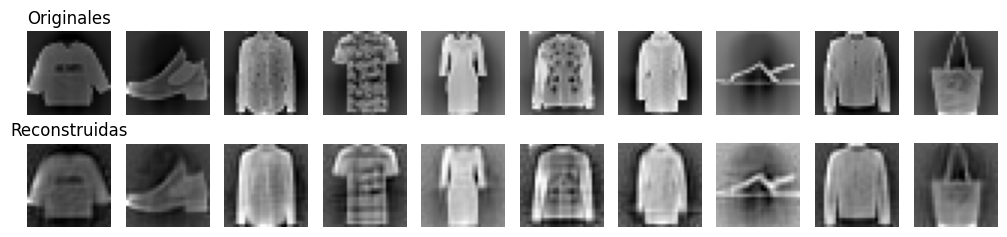

In [ ]:
X_reconstructed_1 = pca.inverse_transform(X_pca_1)

fig, axes = plt.subplots(2, 10, figsize=(10, 2.5))
for i in range(10):
    axes[0, i].imshow(X_scaled_1[i].reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(X_reconstructed_1[i].reshape(28, 28), cmap='gray')
    axes[1, i].axis('off')

axes[0, 0].set_title("Originales")
axes[1, 0].set_title("Reconstruidas")
plt.tight_layout()
plt.show()

# **Ejercicio 2: Human Activity Recognition with Smartphones**

El objetivo del segundo ejercicio es realizar un Scree Plot el cual nos muestre cuanta varianza va explicando cada componente principal y realizar una reducción de dimensionalidad a través de ICA con 10 componentes. Por último, comparar varianza vs independencia y realizar conclusiones respecto a ambos modelos.

El dataset que se utilizará es Human Activity Recognition with Smartphones el cual contiene registros de 30 voluntarios (edades entre 19 y 48 años) que llevan un smartphone en la cintura mientras realizan las siguientes actividades del día a día: caminar, subir y bajar escaleras, sentado, de pie y acostado.

Cada fila es una ventana temporal (bloque consecutivo de datos), y las 561 columnas de características incluyen estadísticas en dominio temporal y frecuencia calculadas a partir de las señales.

Partiremos cargando las librerias necesarias para ambas reducciones de dimensionalidad y para la construcción del Scree Plot.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
from sklearn.decomposition import FastICA

Carguemos el dataset y visualicemos las primeras 5 filas para ver su estructura.

In [ ]:
df2 = pd.read_csv(path2 + '/train.csv')
df2.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


Veamos si el dataset posee algún valor nulo para proceder a corregirlo.

In [ ]:
nulos = df2.isnull().any().any()
print(f"¿Hay algún valor nulo en el DataFrame? {nulos}")

¿Hay algún valor nulo en el DataFrame? False


Notemos que las últimas dos columnas no aportan información para realizar la reducción de dimensionalidad. La penúltima representa el número del voluntario y la última son strings que indican la actividad que se está realizando.

Por esto procederemos a eliminarlas.

In [ ]:
X = df2.drop(columns=['subject','Activity'])
X.shape

(7352, 561)

In [ ]:
y = df2['Activity'].astype('category').cat.codes
y

,0
0,2
1,2
2,2
3,2
4,2
...,...
7347,5
7348,5
7349,5
7350,5


Antes de realizar tanto PCA como ICA necesitamos estandarizar los datos debido a la sensibilidad de ambos métodos con la escala de las características, es decir datos con dimensionalidad alta se verán muy representados y datos con dimensionalidad baja se verán poco representados.

In [ ]:
scaler = StandardScaler()
X_scaled_2 = scaler.fit_transform(X)

Procedamos a reducir a 10 componentes con PCA para luego aplicar ICA.

In [ ]:
pca = PCA(n_components = 10)
X_pca_10 = pca.fit_transform(X_scaled_2)

Por otro lado, realizaremos la reducción de dimensionalidad con ICA y 10 componentes. A diferencia de PCA este método priorizará la independencia de las características y no se concentrará en retener la mayor cantidad de varianza.

In [ ]:
ica = FastICA(n_components=10, random_state=42)
X_ica_2 = ica.fit_transform(X_pca_10)

X_ica_2.shape

(7352, 10)

Por último visualicemos las reducciones a través de PCA y de ICA.

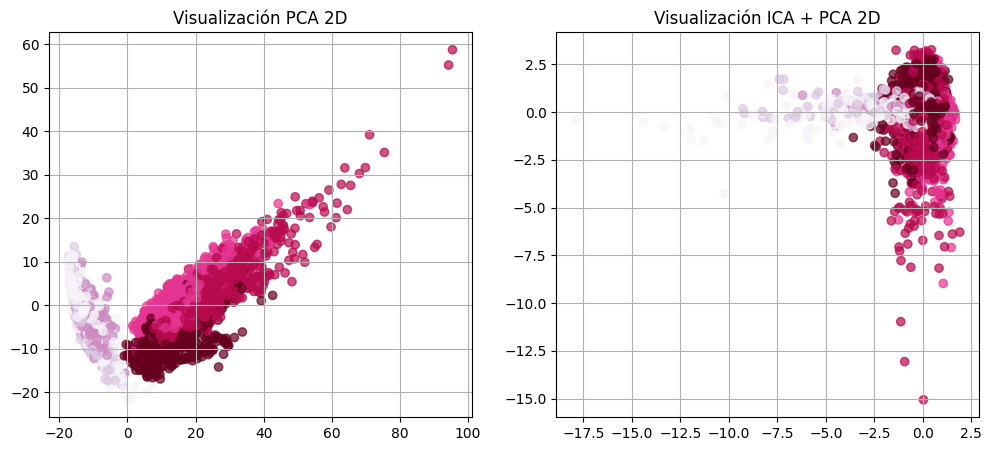

In [ ]:
X_pca_2 = pca.fit_transform(X_scaled_2)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

scatter_ax0 = axs[0].scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=y, cmap='PuRd', alpha=0.7)
axs[0].set_title('Visualización PCA 2D')
axs[0].grid(True)

scatter_ax1 = axs[1].scatter(X_ica_2[:, 0], X_ica_2[:, 1], c=y, cmap='PuRd', alpha=0.7)
axs[1].set_title('Visualización ICA + PCA 2D')
axs[1].grid(True)

plt.show()

**Comparemos ambos métodos de reducción de dimensionalidad**

- Si el objetivo es principalmente reducir la dimensionalidad del dataset para mejorar la eficiencia de algún modelo o actividades del estilo entonces PCA podría ser suficiente.

- Si el objetivo es obtener las características que tengan una interpretación más directa o analizar la independencia entre las señales y/o la independencia entre las diferentes fuentes de movimiento obtenidas a través de los sensores entonces ICA podría ser suficiente.

- Al aplicar PCA y luego ICA lo que se busca es encontrar componentes independientes asumiento que los datos entregados son una mezcla lineal. Es decir, ICA intenta encontrar componentes independientes dentro del subespacio definido por las componentes principales entregadas por PCA.

# **Ejercicio 3: Wine Quality**

El objetivo del tercer ejercicio es realizar una proyección supervisada a través de LDA a 2 componentes y gráficarlo.

El dataset a utilizar será Wine Quality el cual contiene las propiedades fisicoquímicas de vinos de la región de Vinho Verde (norte de Portugal). También posee una variables de calidad, la cuál es entregada por la calificación de expertos a través del análisis de sus características. Posee 1599 muestras de vino tinto y 4898 muestras de vino blanco.

Partiremos cargando las librerías a utilizar en la reducción de dimensionalidad y para la realización del gráfico requerido.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Carguemos el dataset y visualicemos las primeras 5 filas para ver su estructura.

In [ ]:
df3 = pd.read_csv(path3 + '/winequalityN.csv')
df3.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Veamos si el dataset posee algún valor nulo para corregirlo.

In [ ]:
df3.isnull().sum()

,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


Notemos que existen 7 características del vino con datos nulos. Como en este ejercicio solo queremos visualizar los datos procederemos a eliminar las filas nulas.


In [ ]:
df3 = df3.dropna()
df3.isnull().sum()

,0
type,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0


Notemos que la última variable del dataset es la calidad del vino, por lo que separaremos el dataset entre las características que definen al vino y la variable objetivo, en este caso la calidad. Además, la primera variables es el tipo de vino así que la eliminaremos ya que no aporta en la reducción de dimensionalidad.

In [ ]:
X = df3.drop(columns=['type','quality'])
y = df3['quality']

Antes de realizar la reducción de dimensionalidad procederemos a estandarizar el dataset, debido a que el método LDA es sensible a la escala de las variables.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Ahora procederemos a realizar la reducción de dimensionalidad a través de LDA con 2 componentes. Notemos que al momento de ajustar y transformar los datos escalados le entregamos la variable objetivo ya que este método de reducción de dimensionalidad es supervisado.

Este método no solo busca encontrar las explicación de la máxima varianza sino que también busca encontrar las direcciones que mejor separan las clases definidas por la variable objetivo, en este caso las distintas calidades de vino.

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

Por último, visualizaremos la proyección supervisada de los datos en 2 dimensiones. Para esto tomaremos como colores las etiquetas de la variable objetivo, resultando lo siguiente.

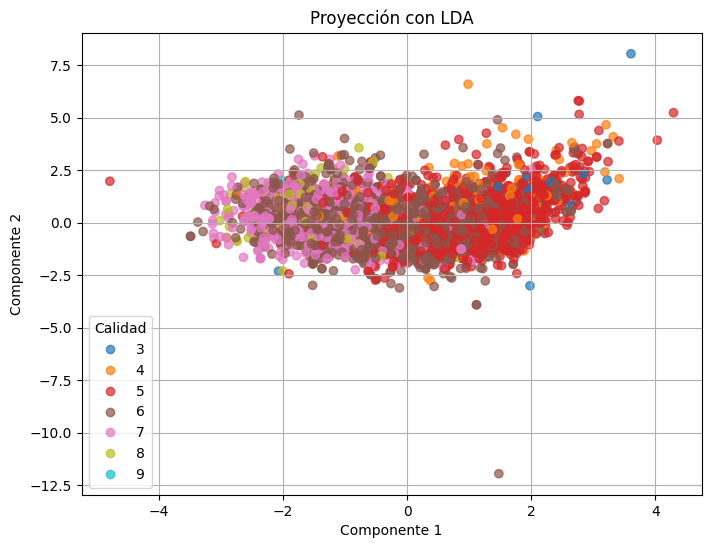

In [ ]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Calidad")
plt.title("Proyección con LDA")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)
plt.show()

# **Ejercicio 4: Credit Card Fraud Detection**

El objetivo del cuarto ejercicio es realizar una reducción de dimensionalidad a través de t-SNE y UMAP a 2 dimensiones. Además de realizar un gráfico coloreando fraude/no fraude.

A diferencia de los modelos vistos en los ejercicios anteriores t-SNE y UMAP son modelos no lineals, es decir, tienen como objetivo preservar las relaciones de vecindad. Para esto utilizan funciones y algoritmos no lineales.

El dataset a utilizar es Credit Card Fraud Detection el cual contiene las transacciones con tarjeta de crédito realizadas por clientes europeos durante dos días en el mes de septiembre de 2013. El dataset posee 284.807 filas de transacciones y 31 columnas de las cuales se tienen componentes principales, tiempo (segundos transcurridos desde la primera transaccion), monto de la transaccion y una variable objetivo que separa casos legítimos y casos fraude.

Partiremos cargando las librerías a utilizar en las reducciones de dimensionalidad y para realizar el gráfico requerido.

In [ ]:
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Carguemos el dataset y visualicemos las primeras 5 filas para ver su estructura.

In [ ]:
df4 = pd.read_csv(path4 + '/creditcard.csv')
df4.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Ahora, veamos si el dataset posee datos nulos para ser arreglados.

In [ ]:
df4.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


Notemos que el dataset posee 3 variables que no aportan información para la reducción de dimensionalidad, estas son Time, Amount y Class. Procederemos a eliminarlas y Class la guardaremos en la variable objetivo para luego usarla al momento de visualizar.

In [ ]:
X = df4.drop(columns=['Time', 'Amount', 'Class'])
y = df4['Class']

Veamos entre que valores se mueven las variables del dataset para ver si es necesario estandarizarlos.

In [ ]:
print(X.describe().loc[['min','max']])
print(y.describe().loc[['min','max']])

           V1         V2         V3         V4          V5         V6  \
min -56.40751 -72.715728 -48.325589  -5.683171 -113.743307 -26.160506   
max   2.45493  22.057729   9.382558  16.875344   34.801666  73.301626   

             V7         V8         V9        V10  ...       V19        V20  \
min  -43.557242 -73.216718 -13.434066 -24.588262  ... -7.213527 -54.497720   
max  120.589494  20.007208  15.594995  23.745136  ...  5.591971  39.420904   

           V21        V22        V23       V24        V25       V26  \
min -34.830382 -10.933144 -44.807735 -2.836627 -10.295397 -2.604551   
max  27.202839  10.503090  22.528412  4.584549   7.519589  3.517346   

           V27        V28  
min -22.565679 -15.430084  
max  31.612198  33.847808  

[2 rows x 28 columns]
min    0.0
max    1.0
Name: Class, dtype: float64


Notemos que antes de realizar las reducciones de dimensionalidad necesitamos estandarizar el dataset, debido a que tanto t-SNE como UMAP son sensibles a la escalabilidad de la dimensión.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Partiremos usando t-SNE. Este es un modelo no lineal, por lo que se ocupa una metodología de entrenamiento para preservar la cercanía y lejanía de los puntos al reducir la dimensionalidad. Se utiliza porque es muy rápido y eficiente para poder visualizar.

In [ ]:
# tsne = TSNE(n_components=2, # Numero de componentes
#            perplexity=48, # Vecinos cercanos
#            learning_rate=200, # Taza de aprendizaje
#            random_state=42) # Semilla

# X_tsne = tsne.fit_transform(X_scaled)

Notemos que al ejecutar el modelo se demora un tiempo considerable en terminar de compilar. Por esto, tomaremos un porcentaje de los datos para poder realizar la visualización (aproximadamente 10.000 entradas).

In [ ]:
X_red,_, y_red,_ = train_test_split(X_scaled, y, test_size=0.965,random_state = 42, stratify=y)

Ahora, procederemos a realizar la reducción de dimensionalidad por t-SNE.

In [ ]:
tsne = TSNE(n_components=2, # Numero de componentes
            perplexity=48, # Vecinos cercanos
            learning_rate=200, # Taza de aprendizaje
            random_state=42) # Semilla

X_tsne = tsne.fit_transform(X_red)

Por último, procederemos con la visualización de los datos luego de la reducción de dimensionalidad.

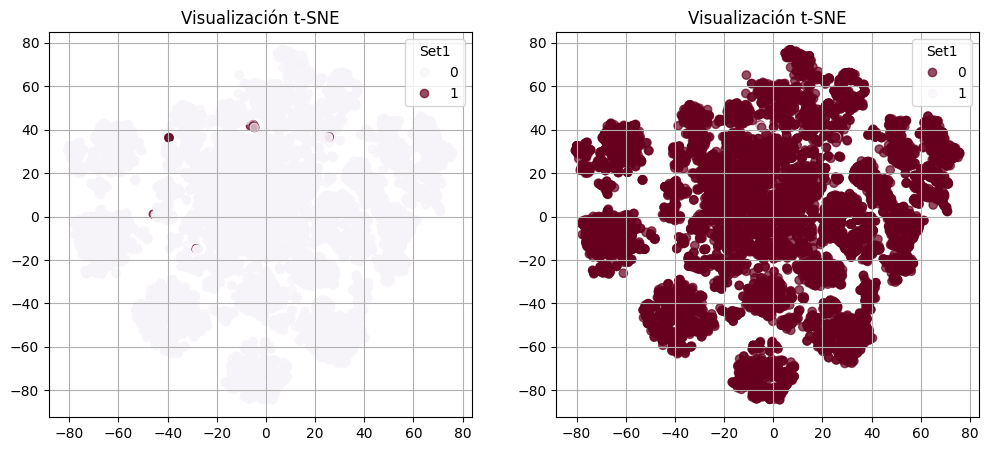

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

scatter_ax0 = axs[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_red, cmap='PuRd', alpha=0.7)
axs[0].legend(*scatter_ax0.legend_elements(), title="Set1")
axs[0].set_title('Visualización t-SNE')
axs[0].grid(True)

scatter_ax1 = axs[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_red, cmap='PuRd_r', alpha=0.7)
axs[1].legend(*scatter_ax1.legend_elements(), title="Set1")
axs[1].set_title('Visualización t-SNE')
axs[1].grid(True)

plt.show()

Notemos que la información entregada del dataset nos indica que los casos de fraude son un 0.172% de todas las transacciones, lo cual se evidencia en los gráficos de la reducción de dimensionalidad.

Ahora, se realizará la reducción de dimensionalidad y gráfico a través del método UMAP.

UMAP es una proyección no lineal que consiste en modelar las relaciones topológicas entre puntos usando grafos, con el objetivo de mantener la estructura global y local.

Usaremos el mismo número de datos que en t-SNE para poder comparar sus reducciones y realizar una conclusión (10.000 muestras aprox.).

In [ ]:
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_red)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Luego, procedemos a visualizar la reducción.

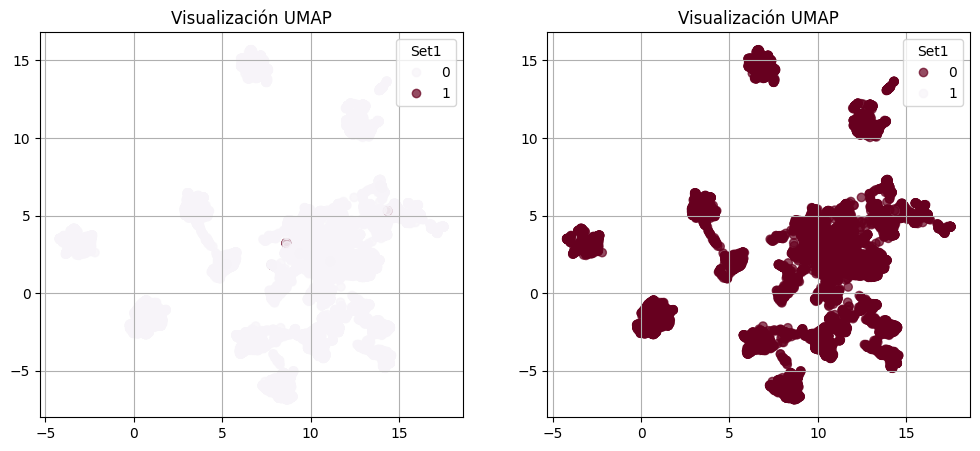

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

scatter_ax0 = axs[0].scatter(X_umap[:, 0], X_umap[:, 1], c=y_red, cmap='PuRd', alpha=0.7)
axs[0].legend(*scatter_ax0.legend_elements(), title="Set1")
axs[0].set_title('Visualización UMAP')
axs[0].grid(True)

scatter_ax1 = axs[1].scatter(X_umap[:, 0], X_umap[:, 1], c=y_red, cmap='PuRd_r', alpha=0.7)
axs[1].legend(*scatter_ax1.legend_elements(), title="Set1")
axs[1].set_title('Visualización UMAP')
axs[1].grid(True)

plt.show()

Al igual que con t-SNE, los gráficos de la reducción por UMAP evidencian que los casos de fraude solo representan el 0.172% de los datos totales.


Por último, realicemos una comparación de ambos métodos:

- t-SNE se enfoca en preservar las distancias locales, lo que es útil para visualizar agrupaciones. Sin embargo, no siempre preserva la estructura global y puede ser más lento con grandes datasets.

- UMAP se enfoca en preservar tanto la estructura local como la global, lo que puede representar una ventaja. En este caso vimos que UMAP fue considerablemente más rápido que t-SNE.

- En las gráficas se observa una diferencia entre las agrupaciones, esto se debe a que t-SNE no garantiza que la distancia entre los clústeres sea representativa de su distancia en el espacio original, como si lo hace UMAP.


La elección entre uno u otro dependerá principalmente del objetivo a cumplir al momento de realizar la reducción. También dependerá del tamaño del dataset y del tiempo requerido para realizar la tarea.

Por lo tanto, para enfoques en visualización de agrupaciones locales y datasets pequeños es preferible t-SNE; por otro lado para enfoques de búsqueda de una mejor representación de la estructura global de los datos y datasets grandes es preferible UMAP.

# **Ejercicio 5: Energy Efficiency**

El objetivo del quinto ejercicio es realizar una reducción de dimensionalidad a través de PCA con 2 componentes. Esto con la intención de poder mostrar por qué la reducción no siempre es necesaria.

Se utilizará el dataset Energy Efficiency el cual son datos obtenidos de simulaciones en Ecotect para 12 tipos de edificios con distintas características, entre las que se encuentran: Orientación, Envidriado, Formas arquitectónicas, etc. Posee 768 muestras con 8 variables de entrada. Las varaibles objetivos del dataset son Heating Load y Cooling Load.

Partiremos cargando las librerias necesarias para la reducción.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Cargaremos el dataset y visualicemos las primeras 5 filas, para ver su estructura.

In [ ]:
df5 = pd.read_csv(path5 + '/energy_efficiency_data.csv')
df5.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Veamos si el dataset posee nulos, y de ser así, procederemos a arreglarlos.

In [ ]:
df5.isnull().sum()

,0
Relative_Compactness,0
Surface_Area,0
Wall_Area,0
Roof_Area,0
Overall_Height,0
Orientation,0
Glazing_Area,0
Glazing_Area_Distribution,0
Heating_Load,0
Cooling_Load,0


Como las últimas dos variables son de objetivo, las eliminaremos para realizar la reducción.

In [ ]:
df5 = df5.drop(columns=['Cooling_Load', 'Heating_Load'])

Como vimos anteriormente, PCA es sensible a la dimensionalidad, por lo que procederemos a estandarizar los datos.


In [ ]:
scaler = StandardScaler()
X_scaled_5 = scaler.fit_transform(df5)

Ahora, aplicaremos el método PCA con reducción a 2 componentes y veremos cuánta es la varianza que explican.

In [ ]:
pca = PCA(n_components=2)
X_pca_5 = pca.fit_transform(X_scaled_5)

varianza_5 = pca.explained_variance_ratio_
sum(varianza_5)

np.float64(0.6178488249883751)

Notemos que la varianza explicada por las dos componentes no es mayor o igual a 90%, sino que solo retiene aproximadamente el 62% de la varianza.



Veamos cuántas componentes son necesarias para abarcar un 90% o más de la varianza.

In [ ]:
pca = PCA(n_components=0.9)
X_pca_90 = pca.fit_transform(X_scaled_5)

X_pca_90.shape



(768, 5)

Como podemos notar, hacen falta 5 componentes para obtener una varianza
explicada acumulada mayor a 90% por lo que en este caso no resulta una
ventaja aplicar PCA con pocas componentes.

Veamos un gráfico de barra para ver cuanta es la varianza que van explicando las componentes.


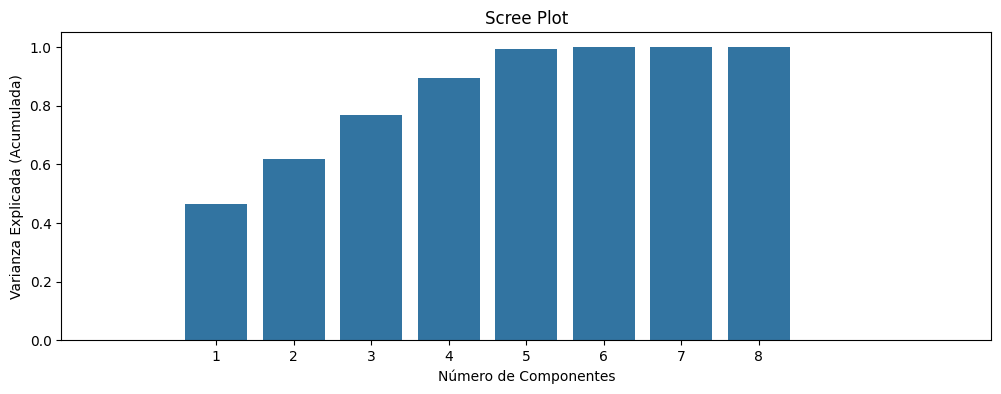

In [ ]:
pca = PCA()
X_pca_acum = pca.fit_transform(X_scaled_5)

varianza_acum = pca.explained_variance_ratio_

x = np.arange(1, len(varianza_acum) + 1)

plt.figure(figsize=(12, 4))
sns.barplot(x=x,y=np.cumsum(varianza_acum))
plt.xlim(-2,10)
plt.title('Scree Plot')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada (Acumulada)')
plt.grid(False)
plt.show()

Por lo tanto podemos concluir que en este caso realizar una reduccion a una dimensionalidad baja no representa una ventaja, debido a que la varianza explicada por ellas no es suficientemente alta.
 Se observa que desde la quinta componente la varianza explicada comienza a ser mayor que 90%, pero el dataset cuenta con solo 8 variables, lo cual evidencia lo mencionado anteriormente.

# **Parte 2 Modelos - Supervisados sobre Datos Reducidos**

# **Ejercicio 1: Fashion MNIST**

El objetivo del primer ejercicio es aplicar los modelos supervisados Logistic Regresion, SVM y k-NN con y sin PCA para comparar sus rendimientos y utilidades.

## **Modelo 1.1: Logistic Regresion**

Partamos cargando los datasets y las librerías necesarias.



In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df1_train = pd.read_csv(path1 + '/fashion-mnist_train.csv')
df1_test = pd.read_csv(path1 + '/fashion-mnist_test.csv')

df1_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


Antes de todo veamos si los datos poseen nulos ya que esto provoca que los modelos no funcionen.

In [ ]:
nulos1 = df1_train.isnull().any().any()
nulos2 = df1_test.isnull().any().any()
print(f"¿Hay algún valor nulo en el DataFrame de entrenamiento? {nulos1}")
print(f"¿Hay algún valor nulo en el DataFrame de prueba? {nulos2}")

¿Hay algún valor nulo en el DataFrame de entrenamiento? False
¿Hay algún valor nulo en el DataFrame de prueba? False


Separemos entre variables objetivo y las variables que definen los pixeles.

In [ ]:
X_tr = df1_train.drop(columns=['label'])
y_tr = df1_train['label']

X_te = df1_test.drop(columns=['label'])
y_te = df1_test['label']

Veamos la distribución de frecuencia de las distintas prendas de vestir para ver la necesidad de balancear las clases y así no hayan algunas que se vean mayormente representadas y otras que no.

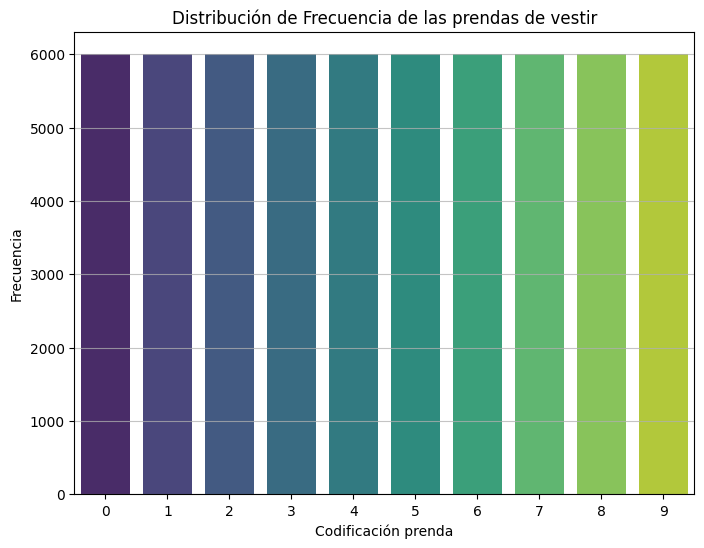

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_tr, palette='viridis')
plt.title('Distribución de Frecuencia de las prendas de vestir')
plt.xlabel('Codificación prenda')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

Dado que las clases están balanceadas, no es necesario aplicar técnicas de balanceo, ya que el modelo no se verá afectado por un desbalance en la distribución de clases.

Sin reducción PCA:

Contruyamos el pipeline del modelo. Notemos que como el dataset es de imágenes todas las variables son numéricas por lo que solo aplicaremos Standard Scaler para optimizar el modelo.

In [ ]:
pipe_log_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(random_state=42, # Semilla
                                    max_iter=1000, # Maximo de iteraciones
                                    solver='liblinear', # Metodo de optimizacion
                                    penalty = 'l1', # Funcion de penalizacion
                                    C = 0.1 # Parametro de regularizacion
                                    ))
])

Procedamos a entrenar el modelo.

In [ ]:
pipe_log_reg.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(C=0.1, max_iter=1000, penalty='l1',
                                    random_state=42, solver='liblinear'))])

Una vez entrenado el modelo, continuamos con la realización de la predicción.

In [ ]:
y_pred_log = pipe_log_reg.predict(X_te)

Por últimos procedemos a mostrar las métricas para poder concluir que tan bien actuó el modelo.

In [ ]:
print(confusion_matrix(y_te, y_pred_log))
print(classification_report(y_te, y_pred_log))

[[822   3  15  48   1   5  87   0  19   0]
 [  3 972   2  16   0   2   5   0   0   0]
 [ 17   2 781   8 112   0  71   0   9   0]
 [ 30  18  16 886  23   1  23   0   3   0]
 [  2   1  73  31 810   1  78   0   4   0]
 [  2   1   0   2   0 918   0  49   9  19]
 [164   5 109  43  86   2 568   1  22   0]
 [  0   0   0   0   0  43   0 915   1  41]
 [  5   0   6  15   3   9  15   4 943   0]
 [  0   0   0   0   0  13   0  40   0 947]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1000
           1       0.97      0.97      0.97      1000
           2       0.78      0.78      0.78      1000
           3       0.84      0.89      0.86      1000
           4       0.78      0.81      0.80      1000
           5       0.92      0.92      0.92      1000
           6       0.67      0.57      0.62      1000
           7       0.91      0.92      0.91      1000
           8       0.93      0.94      0.94      1000
           9       0.94     

Con reducción PCA:

Construyamos el pipeline del modelo ahora agregando la reducción de dimensionalidad.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pipe_log_reg_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('log_reg', LogisticRegression(random_state=42, # Semilla
                                    max_iter=1000, # Maximo de iteraciones
                                    solver='liblinear', # Metodo de optimizacion
                                    penalty = 'l1', # Funcion de penalizacion
                                    C = 0.1 # Parametro de regularizacion
                                    ))
])

Procedamos a entrenar el modelo con reducción PCA.

In [ ]:
pipe_log_reg_pca.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('log_reg',
                 LogisticRegression(C=0.1, max_iter=1000, penalty='l1',
                                    random_state=42, solver='liblinear'))])

In [ ]:
y_pred_log_pca = pipe_log_reg_pca.predict(X_te)

In [ ]:
print(confusion_matrix(y_te, y_pred_log_pca))
print(classification_report(y_te, y_pred_log_pca))

[[816   2  14  57   0   3  89   0  19   0]
 [  3 972   3  14   1   2   4   1   0   0]
 [ 14   2 783  12 114   0  63   0  11   1]
 [ 28  19  17 885  25   0  25   0   1   0]
 [  2   1  77  35 804   1  77   1   2   0]
 [  3   0   0   0   0 919   1  47  11  19]
 [168   3 114  47  86   2 560   1  19   0]
 [  0   0   0   0   0  44   0 906   1  49]
 [  4   0   7  10   4   7  20   4 943   1]
 [  0   0   0   0   0  16   0  39   0 945]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1000
           1       0.97      0.97      0.97      1000
           2       0.77      0.78      0.78      1000
           3       0.83      0.89      0.86      1000
           4       0.78      0.80      0.79      1000
           5       0.92      0.92      0.92      1000
           6       0.67      0.56      0.61      1000
           7       0.91      0.91      0.91      1000
           8       0.94      0.94      0.94      1000
           9       0.93     

## **Modelo 1.2: SVM**

Partamos cargando las librerías necesarias.

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

Como ya separamos los datos procedamos a hacer los pipelines de los modelos.

Sin reducción PCA:

Construyamos el pipeline del modelo sin reducción de dimensionalidad.

In [ ]:
pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=42,
                C=0.1,
                kernel='rbf',
                gamma='scale'
                ))
])

Continuemos con el entrenamiento del modelo.

In [ ]:
pipe_svm.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(C=0.1, random_state=42))])

Ahora seguimos con la predicción del modelo.

In [ ]:
y_pred_svm = pipe_svm.predict(X_te)

Por último veremos las métricas para evaluar que tan buena fue la predicción.

In [ ]:
print(confusion_matrix(y_te, y_pred_svm))
print(classification_report(y_te, y_pred_svm))

[[822   0   7  63   0   2  80   0  26   0]
 [  5 961   4  22   1   1   5   0   1   0]
 [  9   0 767  12 121   1  75   0  15   0]
 [ 25   5   9 914  20   0  25   0   2   0]
 [  1   0  51  32 837   0  72   0   7   0]
 [  2   0   0   1   0 911   0  48  13  25]
 [191   0  96  38  72   0 573   0  30   0]
 [  0   0   0   0   0  33   0 901   0  66]
 [  1   0   3   4   3   4  13   2 969   1]
 [  0   0   0   0   0  17   0  43  11 929]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1000
           1       0.99      0.96      0.98      1000
           2       0.82      0.77      0.79      1000
           3       0.84      0.91      0.88      1000
           4       0.79      0.84      0.81      1000
           5       0.94      0.91      0.93      1000
           6       0.68      0.57      0.62      1000
           7       0.91      0.90      0.90      1000
           8       0.90      0.97      0.93      1000
           9       0.91     

Con reducción PCA:

Construyamos el pipeline del modelo ahora agregando la reducción de dimensionalidad.

In [ ]:
pipe_svm_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('svm', SVC(random_state=42,
                C=0.1,
                kernel='rbf',
                gamma='scale'
                ))
])

Procedemos a entrenar el modelo con reducción PCA.

In [ ]:
pipe_svm_pca.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('svm', SVC(C=0.1, random_state=42))])

Se sigue con la predicción del modelo

In [ ]:
y_pred_svm_pca = pipe_svm_pca.predict(X_te)

Por último mostramos las métricas para evaluar la predicción

In [ ]:
print(confusion_matrix(y_te, y_pred_svm_pca))
print(classification_report(y_te, y_pred_svm_pca))

[[825   0   7  64   0   2  77   0  25   0]
 [  5 961   4  22   1   1   5   0   1   0]
 [  9   0 775  12 117   1  72   0  14   0]
 [ 25   5  10 916  20   0  22   0   2   0]
 [  1   0  52  32 832   0  76   0   7   0]
 [  2   0   0   1   0 901   0  59  12  25]
 [192   0  94  38  74   0 572   0  30   0]
 [  0   0   0   0   0  31   0 901   0  68]
 [  2   0   5   4   2   4  10   2 970   1]
 [  0   0   0   0   0  17   0  42  10 931]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1000
           1       0.99      0.96      0.98      1000
           2       0.82      0.78      0.80      1000
           3       0.84      0.92      0.88      1000
           4       0.80      0.83      0.81      1000
           5       0.94      0.90      0.92      1000
           6       0.69      0.57      0.62      1000
           7       0.90      0.90      0.90      1000
           8       0.91      0.97      0.94      1000
           9       0.91     

## **Modelo 1.3: k-NN**

Partamos cargando las librerías necesarias.

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

Al igual que en el ejercicio anterior, ya que ya cargamos el dataset y se hizo el split de los datos procedemos a construir los pipelines de los modelos.

Sin reducción PCA:

In [ ]:
# Hcerlo con grilla
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3,
                                 p=2,
                                 metric='minkowski'
                                 ))
])

Entrenamiento del modelo.

In [ ]:
pipe_knn.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

Continuamos con la predicción.

In [ ]:
y_pred_knn = pipe_knn.predict(X_te)

Por último veamos las métricas para evaluar que tan bien predijo el modelo

In [ ]:
print(confusion_matrix(y_te, y_pred_knn))
print(classification_report(y_te, y_pred_knn))

[[866   1  12  13   1   0 101   1   5   0]
 [  5 973   3  12   2   0   5   0   0   0]
 [ 23   2 800  12  90   0  72   0   1   0]
 [ 43  10  14 873  30   0  30   0   0   0]
 [  8   0 118  29 767   0  77   0   1   0]
 [  3   0   1   1   0 845   3  88   2  57]
 [194   1 107  20  55   0 619   0   4   0]
 [  0   0   0   0   0   6   0 941   0  53]
 [  8   2  14   2   6   1  19   4 941   3]
 [  1   0   0   0   0   4   0  31   0 964]]
              precision    recall  f1-score   support

           0       0.75      0.87      0.81      1000
           1       0.98      0.97      0.98      1000
           2       0.75      0.80      0.77      1000
           3       0.91      0.87      0.89      1000
           4       0.81      0.77      0.79      1000
           5       0.99      0.84      0.91      1000
           6       0.67      0.62      0.64      1000
           7       0.88      0.94      0.91      1000
           8       0.99      0.94      0.96      1000
           9       0.90     

Con redución PCA:

Ahora, procedemos a aplicar reducción de dimensionalidad PCA dentro del modelo.

In [ ]:
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('knn', KNeighborsClassifier(n_neighbors=3,
                                 p=2,
                                 metric='minkowski'
                                 ))

])

Realizamos el entrenamiento del modelo.

In [ ]:
pipe_knn.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.95)),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

Seguimos con la predicción.

In [ ]:
y_pred_knn_pca = pipe_knn.predict(X_te)

Por último veamos las métricas para evaluar si la predicción del modelo resultó ser una buena predicción.

In [ ]:
print(confusion_matrix(y_te, y_pred_knn_pca))
print(classification_report(y_te, y_pred_knn_pca))

[[860   1  14  14   1   0 105   1   4   0]
 [  4 973   1  15   2   0   5   0   0   0]
 [ 21   2 781  12 106   0  77   0   1   0]
 [ 38   6  18 886  31   0  20   0   1   0]
 [  7   0 101  26 792   0  73   0   1   0]
 [  1   0   1   1   0 885   1  62   2  47]
 [185   1  92  21  63   0 633   0   5   0]
 [  0   0   0   0   0  12   0 939   0  49]
 [  8   1  12   2   5   1  16   4 948   3]
 [  1   0   0   0   0   6   0  33   0 960]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.77      0.78      0.77      1000
           3       0.91      0.89      0.90      1000
           4       0.79      0.79      0.79      1000
           5       0.98      0.89      0.93      1000
           6       0.68      0.63      0.66      1000
           7       0.90      0.94      0.92      1000
           8       0.99      0.95      0.97      1000
           9       0.91     

# **Ejercicio 2: Human Activity Recognition with Smartphones**

El objetivo del segundo ejercicio es aplicar los modelos supervisados Random Forest, k-NN y Gradient Boosting con y sin PCA para comparar sus rendimientos y utilidades.

## **Modelo 2.1: Random Forest**

Partamos cargando el dataset y las librería necesarias.

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df2 = pd.read_csv(path2 + '/train.csv')

Separemos las columnas y asignemosle a X las variables que determinan la actividad y a y la variable objetivo. Además categorizaremos la variable objetivo para que el modelo funcione correctamente.

In [ ]:
X = df2.drop(columns=['subject','Activity'])
y = df2['Activity'].astype('category').cat.codes

Separemos los datos en entrenamiento y test.

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

Veamos la distribución de frecuencia de las distintas actividades para ver la necesidad de balancear las clases y así no hayan algunas que se vean mayormente representadas y otras que no.

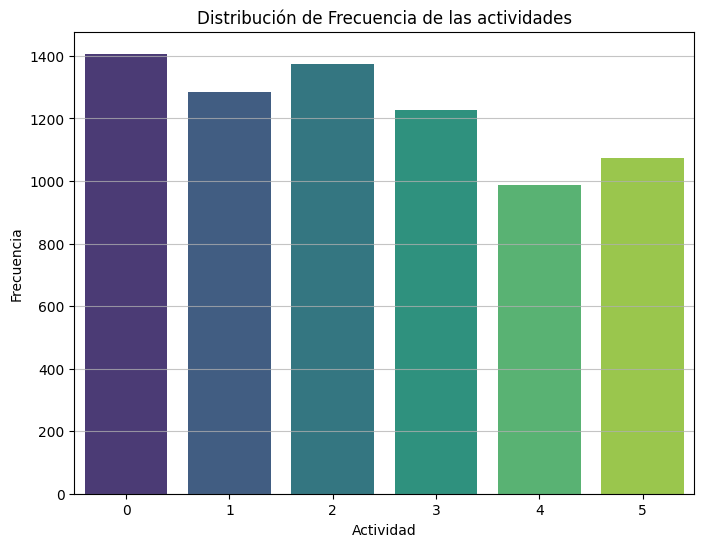

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette='viridis')
plt.title('Distribución de Frecuencia de las actividades')
plt.xlabel('Actividad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

Observamos que que las distribuciones entre clases no varian de forma drástica, por tanto no es necesario aplicar técnica de balanceo de clases.

Sin reducción ICA:

Creemos el pipeline del modelo.

In [ ]:
pipe_rf = Pipeline([
    ('scaler', RobustScaler()),
    ('rf', RandomForestClassifier(random_state=42,
                                  n_estimators=100,
                                  max_depth=None,
                                  max_features='sqrt'
                                  ))
])

Procedemos a entrenar el modelo.

In [ ]:
pipe_rf.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', RobustScaler()),
                ('rf', RandomForestClassifier(random_state=42))])

Seguimos con la predicción.

In [ ]:
y_pred_rf = pipe_rf.predict(X_te)

Por último veamos las métricas para evaluar la predicción del modelo.

In [ ]:
print(confusion_matrix(y_te, y_pred_rf))
print(classification_report(y_te, y_pred_rf))

[[280   0   0   0   0   0]
 [  0 250  12   0   0   0]
 [  0  13 263   0   0   0]
 [  0   0   0 244   0   3]
 [  0   0   0   0 202   4]
 [  0   0   0   0   2 198]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.95      0.95      0.95       262
           2       0.96      0.95      0.95       276
           3       1.00      0.99      0.99       247
           4       0.99      0.98      0.99       206
           5       0.97      0.99      0.98       200

    accuracy                           0.98      1471
   macro avg       0.98      0.98      0.98      1471
weighted avg       0.98      0.98      0.98      1471



Con reducción ICA:

In [ ]:
from sklearn.decomposition import FastICA

Creemos el pipeline del modelo con reducción PCA

In [ ]:
pipe_rf_pca = Pipeline([
    ('scaler', RobustScaler()),
    ('pca', FastICA(n_components=10)),
    ('rf', RandomForestClassifier(random_state=42,
                                  n_estimators=100,
                                  max_depth=None,
                                  max_features='sqrt'
                                  ))
])

Procedemos a entrenar el modelo.

In [ ]:
pipe_rf_pca.fit(X_tr,y_tr)

Pipeline(steps=[('scaler', RobustScaler()), ('pca', FastICA(n_components=10)),
                ('rf', RandomForestClassifier(random_state=42))])

Se sigue con la predicción.

In [ ]:
y_pred_rf_pca = pipe_rf_pca.predict(X_te)

Por último veamos las métricas para evaluar el modelo.

In [ ]:
print(confusion_matrix(y_te, y_pred_rf_pca))
print(classification_report(y_te, y_pred_rf_pca))

[[279   1   0   0   0   0]
 [  1 167  93   1   0   0]
 [  0  42 232   1   0   1]
 [  0   0   0 196  34  17]
 [  0   0   0  25 141  40]
 [  0   0   1  12  25 162]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.80      0.64      0.71       262
           2       0.71      0.84      0.77       276
           3       0.83      0.79      0.81       247
           4       0.70      0.68      0.69       206
           5       0.74      0.81      0.77       200

    accuracy                           0.80      1471
   macro avg       0.80      0.79      0.79      1471
weighted avg       0.80      0.80      0.80      1471



## **Modelo 2.2: k-NN**

Partamos cargando las librerías necesarias para la evaluación del modelo.

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

Como los datos ya están divididos procedemos a hacer el pipeline del modelo.

Sin reducción ICA:

In [ ]:
pipe_knn = Pipeline([
    ('scaler', RobustScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3,
                                 p=2,
                                 metric='minkowski'
                                 ))
])

Procedemos a entrenar el modelo.

In [ ]:
pipe_knn.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', RobustScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

Ahora, realizamos la predicción.

In [ ]:
y_pred_knn = pipe_knn.predict(X_te)

Por último veamos las métricas para evaluar la predicción

In [ ]:
print(confusion_matrix(y_te, y_pred_knn))
print(classification_report(y_te, y_pred_knn))

[[278   1   0   0   1   0]
 [  1 225  36   0   0   0]
 [  0  15 261   0   0   0]
 [  0   0   0 231   6  10]
 [  0   0   0  38 149  19]
 [  0   0   1  24   5 170]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       280
           1       0.93      0.86      0.89       262
           2       0.88      0.95      0.91       276
           3       0.79      0.94      0.86       247
           4       0.93      0.72      0.81       206
           5       0.85      0.85      0.85       200

    accuracy                           0.89      1471
   macro avg       0.90      0.88      0.89      1471
weighted avg       0.90      0.89      0.89      1471



Con reducción ICA:

Realizamos el pipeline del modelo con reducción de dimensionalidad.

In [ ]:
pipe_knn_ica = Pipeline([
    ('scaler', RobustScaler()),
    ('pca', FastICA(n_components=10)),
    ('knn', KNeighborsClassifier(n_neighbors=3,
                                 p=2,
                                 metric='minkowski'
                                 ))
])

Procedamos a entrenar el modelo.

In [ ]:
pipe_knn_ica.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', RobustScaler()), ('pca', FastICA(n_components=10)),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

Realizamos la predicción del modelo.

In [ ]:
y_pred_knn_ica = pipe_knn_ica.predict(X_te)

Por último veamos las métricas para evaluar la predicción del modelo.

In [ ]:
print(confusion_matrix(y_te, y_pred_knn_ica))
print(classification_report(y_te, y_pred_knn_ica))

[[279   0   0   0   1   0]
 [  1 165  95   1   0   0]
 [  0  63 212   0   0   1]
 [  0   0   2 209  17  19]
 [  0   0   0  63 104  39]
 [  0   3   0  50  18 129]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.71      0.63      0.67       262
           2       0.69      0.77      0.72       276
           3       0.65      0.85      0.73       247
           4       0.74      0.50      0.60       206
           5       0.69      0.65      0.66       200

    accuracy                           0.75      1471
   macro avg       0.75      0.73      0.73      1471
weighted avg       0.75      0.75      0.74      1471



## **Modelo 2.3: Gradient Boosting**

Partamos cargando las librerías necesarias para utilizar el modelo.

In [ ]:
import pandas as pd
from sklearn.decomposition import FastICA
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

Como los datos ya están divididos hagamos los pipeline de los modelos.

Sin reducción ICA:

In [ ]:
pipe_gbr = Pipeline([
    ("scaler", RobustScaler()),
    ("gbr", GradientBoostingClassifier(
        n_estimators=300, # Cantidad de árboles
        max_depth=3, # Profundidad de cada árbol
        learning_rate=0.05, # Tasa de aprendizaje (peso de cada árbol)
        random_state=42 # Semilla
    ))
])

Procedemos a entrenar el modelo.

In [ ]:
pipe_gbr.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', RobustScaler()),
                ('gbr',
                 GradientBoostingClassifier(learning_rate=0.05,
                                            n_estimators=300,
                                            random_state=42))])

Seguimos con la predicción de este.

In [ ]:
y_pred_gbr = pipe_gbr.predict(X_te)

Por último vemos las métricas para evaluar la predicción del modelo.

In [ ]:
print(confusion_matrix(y_te, y_pred_gbr))
print(classification_report(y_te, y_pred_gbr))

[[280   0   0   0   0   0]
 [  0 255   7   0   0   0]
 [  0   5 271   0   0   0]
 [  0   0   0 245   0   2]
 [  0   0   0   0 205   1]
 [  0   0   0   0   0 200]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.98      0.97      0.98       262
           2       0.97      0.98      0.98       276
           3       1.00      0.99      1.00       247
           4       1.00      1.00      1.00       206
           5       0.99      1.00      0.99       200

    accuracy                           0.99      1471
   macro avg       0.99      0.99      0.99      1471
weighted avg       0.99      0.99      0.99      1471



Notemos que el modelo tuvo muy buenos resultados pero se demoró 50 min, por lo que probaremos cambiando sus parámetros para ver si no se pierde la efectividad del modelo y se mejoran los tiempos de ejecución.

Realizamos el pipeline del modelo, variando algunos parámetros.

In [ ]:
pipe_gbr_2 = Pipeline([
    ("scaler", RobustScaler()),
    ("gbr", GradientBoostingClassifier(
        n_estimators=100, # Cantidad de árboles
        max_depth=3, # Profundidad de cada árbol
        learning_rate=0.1, # Tasa de aprendizaje (peso de cada árbol)
        random_state=42 # Semilla
    ))
])

Procedemos a entrenar el modelo.

In [ ]:
pipe_gbr_2.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', RobustScaler()),
                ('gbr', GradientBoostingClassifier(random_state=42))])

Seguimos con la predicción.

In [ ]:
y_pred_gbr_2 = pipe_gbr_2.predict(X_te)

Por último vemos las métricas para evaluar la predicción.

In [ ]:
print(confusion_matrix(y_te, y_pred_gbr_2))
print(classification_report(y_te, y_pred_gbr_2))

[[280   0   0   0   0   0]
 [  0 254   8   0   0   0]
 [  0   4 272   0   0   0]
 [  0   0   0 245   0   2]
 [  0   0   0   0 205   1]
 [  0   0   0   0   0 200]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.98      0.97      0.98       262
           2       0.97      0.99      0.98       276
           3       1.00      0.99      1.00       247
           4       1.00      1.00      1.00       206
           5       0.99      1.00      0.99       200

    accuracy                           0.99      1471
   macro avg       0.99      0.99      0.99      1471
weighted avg       0.99      0.99      0.99      1471



Como podemos notar los cambios son insignificantes, el GBC con 100 árboles y 0.1 de tasa de aprendizaje falló en únicamente una entrada más que el GBC con 300 árboles y 0.05 tasa de aprendizaje, pero el tiempo de ejecución es considerablemente menor.

El segundo modelo construido se demoró 33 minutos menos y al ser 200 árboles menos consume mucha menos memoria.

Con reducción ICA

Realizamos el pipeline del modelo con reducción de dimensionalidad ICA.

In [ ]:
pipe_gbr_ica = Pipeline([
    ("scaler", RobustScaler()),
    ("ica", FastICA(n_components=10)),
    ("gbr", GradientBoostingClassifier(
        n_estimators=100, # Cantidad de árboles reducida
        max_depth=3, # Profundidad de cada árbol
        learning_rate=0.1, # Tasa de aprendizaje aumentada
        random_state=42 # Semilla
    ))
])

Procedemos a entrenar el modelo.

In [ ]:
pipe_gbr_ica.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', RobustScaler()), ('ica', FastICA(n_components=10)),
                ('gbr', GradientBoostingClassifier(random_state=42))])

Se sigue con la predicción de este.

In [ ]:
y_pred_gbr_ica = pipe_gbr_ica.predict(X_te)

Por último vemos las métricas para evaluar la predicción del modelo.

In [ ]:
print(confusion_matrix(y_te, y_pred_gbr_ica))
print(classification_report(y_te, y_pred_gbr_ica))

[[279   1   0   0   0   0]
 [  0 160 102   0   0   0]
 [  0  45 229   1   0   1]
 [  0   0   0 196  34  17]
 [  0   0   0  25 142  39]
 [  0   0   0  13  27 160]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.78      0.61      0.68       262
           2       0.69      0.83      0.75       276
           3       0.83      0.79      0.81       247
           4       0.70      0.69      0.69       206
           5       0.74      0.80      0.77       200

    accuracy                           0.79      1471
   macro avg       0.79      0.79      0.79      1471
weighted avg       0.80      0.79      0.79      1471



# **Ejercicio 3: Wine Quality**

El objetivo del tercer ejercicio es aplicar los modelos supervisados Logistic Regresion, k-NN y LDA con y sin LDA para comparar sus rendimientos y utilidades.

Partamos con la carga de las librerías necesarias para la realización del preprocesamiento de los datos.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.pipeline        import Pipeline as ImbPipeline
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling  import RandomUnderSampler
from imblearn.combine         import SMOTETomek
from sklearn.model_selection import GridSearchCV

Antes de la realización de los modelos notemos que como habiamos visto en la primera parte este dataset posee nulos, así que procederemos a eliminarlos para que los modelos funcionen correctamente.

In [ ]:
df3 = pd.read_csv(path3 + '/winequalityN.csv')
df3 = df3.dropna()

Ahora procedemos a hacer la separación de los datos entre datos de entrenamiento y datos de testeo. A la variable X le entregamos las características de los vinos y a y le damos la variables objetivo que este caso es la calidad de los vinos.

In [ ]:
X = df3.drop(columns=['type','quality'])
y = df3['quality']

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

Por último, veamos la distribución de las frecuencias en la calidad del vino, por un posible balanceo de clases. Notemos que si alguna clase se ve muy representada en relación a otra, los modelos paramétricos se verán afectados (tal como con la diferencia de dimensionales).


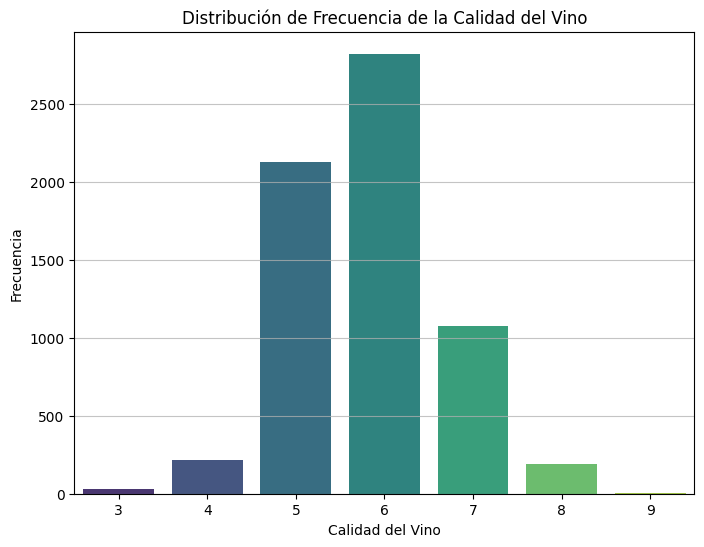

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette='viridis')
plt.title('Distribución de Frecuencia de la Calidad del Vino')
plt.xlabel('Calidad del Vino')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

Como podemos ver, las clases extremas son muy poco frecuentes en comparación a las clases intermedias (lo que uno se esperaría al momento de hablar de calidades). Por lo tanto, se balancearán las clases antes de efectuar los modelos. Se realizará una imputación de datos sintéticos debido a que las clases con menor frecuencia son muy pocas.

## **Modelo 3.1: Logistic Regression**

**Sin reducción LDA:**

En nuestro modelo asumiremos una regularización del tipo Lazzo (l1) con un parametro de regularizacion igual a 0.3. Además para asegurarnos de que el modelo converge, fijaremos un máximo de iteraciones igual a 1000.

Una de las razones por la que usamos una penalización del tipo Lazzo es que en la descripción del dataset no se sabe si todas las variables fisico-quimicas son relevantes para determinar la calidad del vino y esta penalizacion nos permite anular esas variables que quizas no aportan en la variable objetivo.



Generemos el pipeline del modelo:

Ojo: Previamente estandarizamos los datos ya que estamos usando una funcion de penalización. Y realizaremos el balanceo de las clases mencionado anteriormente.

In [ ]:
smote = SMOTETomek(random_state=42, smote=SMOTE(k_neighbors=3))

In [ ]:
pipe_log_reg_bal = ImbPipeline([
    ('smote', smote),
    ('scaler', StandardScaler()),
    ('logi_reg_smote', LogisticRegression(
        random_state=42,
        max_iter=1000,
        solver='liblinear',
        penalty='l1',
        C=0.1,
        class_weight='balanced'
    ))
])

Procedemos a entrenar el modelo

In [ ]:
pipe_log_reg_bal.fit(X_tr, y_tr)

Pipeline(steps=[('smote',
                 SMOTETomek(random_state=42, smote=SMOTE(k_neighbors=3))),
                ('scaler', StandardScaler()),
                ('logi_reg_smote',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    max_iter=1000, penalty='l1',
                                    random_state=42, solver='liblinear'))])

Hacemos las predicciones sobre los datos de entrenamiento y calculamos el desempeño del modelo.

In [ ]:
y_pred_log_bal = pipe_log_reg_bal.predict(X_te)

print(confusion_matrix(y_te, y_pred_log_bal))
print(classification_report(y_te, y_pred_log_bal))

[[  3   1   0   0   0   0   0]
 [ 13  19   8   3   4   1   0]
 [ 80 100 151  46  31  20   2]
 [ 59  73  95  78  98 125  12]
 [ 18  14  10  16  73  88   9]
 [  0   4   0   2   8  25   3]
 [  0   0   0   0   0   0   1]]
              precision    recall  f1-score   support

           3       0.02      0.75      0.03         4
           4       0.09      0.40      0.15        48
           5       0.57      0.35      0.44       430
           6       0.54      0.14      0.23       540
           7       0.34      0.32      0.33       228
           8       0.10      0.60      0.17        42
           9       0.04      1.00      0.07         1

    accuracy                           0.27      1293
   macro avg       0.24      0.51      0.20      1293
weighted avg       0.48      0.27      0.31      1293



**Con reducción LDA:**

Construyamos el mismo modelo, pero ahora agregando la reducción de dimensionalidad

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pipe_log_reg_lda = ImbPipeline([
    ('smote', smote),
    ('scaler', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis(n_components=2)),
    ('log_reg', LogisticRegression(random_state=42, # Semilla
                                    max_iter=1000, # Maximo de iteraciones
                                    solver='liblinear', # Metodo de optimizacion
                                    penalty = 'l1', # Funcion de penalizacion
                                    C = 0.3 # Parametro de regularizacion
                                    ))
])

Entrenamos el modelo

In [ ]:
pipe_log_reg_lda.fit(X_tr, y_tr)

Pipeline(steps=[('smote',
                 SMOTETomek(random_state=42, smote=SMOTE(k_neighbors=3))),
                ('scaler', StandardScaler()),
                ('lda', LinearDiscriminantAnalysis(n_components=2)),
                ('log_reg',
                 LogisticRegression(C=0.3, max_iter=1000, penalty='l1',
                                    random_state=42, solver='liblinear'))])

Predecimos y evaluamos el desempeño

In [ ]:
y_pred_log_lda = pipe_log_reg_lda.predict(X_te)

print(confusion_matrix(y_te, y_pred_log_lda))
print(classification_report(y_te, y_pred_log_lda))

[[  3   1   0   0   0   0   0]
 [ 20   8  10   5   3   2   0]
 [108 122 101  46  29  19   5]
 [ 61  77  68  92 105 112  25]
 [ 19   6   6  20  53  96  28]
 [  2   0   0   1   9  23   7]
 [  0   0   0   0   0   0   1]]
              precision    recall  f1-score   support

           3       0.01      0.75      0.03         4
           4       0.04      0.17      0.06        48
           5       0.55      0.23      0.33       430
           6       0.56      0.17      0.26       540
           7       0.27      0.23      0.25       228
           8       0.09      0.55      0.16        42
           9       0.02      1.00      0.03         1

    accuracy                           0.22      1293
   macro avg       0.22      0.44      0.16      1293
weighted avg       0.47      0.22      0.27      1293



## **Modelo 3.2: k-NN**

**Sin reducción LDA:**

En el modelo k-NN usaremos la distancia euclideana para medir la distancia entre vecinos cercanos y además para ajustar el hiperparámetro de numero de vecinos cercanos usaremos la heuristica de busqueda de por grilla.

Como el modelo kNN involucra el uso distancias es necesario estandarizar los datos

Generemos el pipeline del modelo

In [ ]:
pipe_knn = ImbPipeline([
    ('smote', smote),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(
        n_neighbors=3,
        p=2,
        metric='minkowski'
    ))
])

Procedemos con el entrenamiento.

In [ ]:
pipe_knn.fit(X_tr, y_tr)

Pipeline(steps=[('smote',
                 SMOTETomek(random_state=42, smote=SMOTE(k_neighbors=3))),
                ('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

Seguimos con la predicción y evaluación de esta.

In [ ]:
y_pred_knn_bal = pipe_knn.predict(X_te)

print(confusion_matrix(y_te, y_pred_knn_bal))
print(classification_report(y_te, y_pred_knn_bal))

[[  0   2   2   0   0   0   0]
 [  5  14  19  10   0   0   0]
 [ 11  53 251  77  24  14   0]
 [ 11  44 135 213 103  32   2]
 [  2   5  11  42 136  31   1]
 [  0   2   1   8  13  18   0]
 [  0   0   0   1   0   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.12      0.29      0.17        48
           5       0.60      0.58      0.59       430
           6       0.61      0.39      0.48       540
           7       0.49      0.60      0.54       228
           8       0.19      0.43      0.26        42
           9       0.00      0.00      0.00         1

    accuracy                           0.49      1293
   macro avg       0.29      0.33      0.29      1293
weighted avg       0.55      0.49      0.51      1293



Con reducción LDA:

In [ ]:
pipe_knn_lda_bal = ImbPipeline([
    ('smote', smote),
    ('scaler', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis(n_components=2)),
    ('knn', KNeighborsClassifier(
        n_neighbors=3,
        p=2,
        metric='minkowski'
    ))
])

Procedemos con el entrenamiento.

In [ ]:
pipe_knn_lda_bal.fit(X_tr, y_tr)

Pipeline(steps=[('smote',
                 SMOTETomek(random_state=42, smote=SMOTE(k_neighbors=3))),
                ('scaler', StandardScaler()),
                ('lda', LinearDiscriminantAnalysis(n_components=2)),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

Seguimos con la predicción y evaluación del modelo.

In [ ]:
pred_knn_lda_bal = pipe_knn_lda_bal.predict(X_te)

print(confusion_matrix(y_te, pred_knn_lda_bal))
print(classification_report(y_te, pred_knn_lda_bal))

[[  0   1   3   0   0   0   0]
 [ 14   9  13   8   2   2   0]
 [ 70 122 136  65  26  10   1]
 [ 72 100  89 139  84  48   8]
 [ 25  22  14  39  95  31   2]
 [  4   1   2   7  10  18   0]
 [  0   0   0   0   0   0   1]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.04      0.19      0.06        48
           5       0.53      0.32      0.40       430
           6       0.54      0.26      0.35       540
           7       0.44      0.42      0.43       228
           8       0.17      0.43      0.24        42
           9       0.08      1.00      0.15         1

    accuracy                           0.31      1293
   macro avg       0.26      0.37      0.23      1293
weighted avg       0.48      0.31      0.36      1293



# **Ejercicio 4:  Credit Card Fraud Detection**

El objetivo del cuarto ejercicio es aplicar los modelos supervisados Logistic Regresion y Random Forest con y sin t-SNE y UMAP para comparar sus rendimientos y utilidades.

Partamos cargando las librerías necesarias para la realización de los modelos y el dataset respectivo.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.pipeline        import Pipeline as ImbPipeline
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling  import RandomUnderSampler
from imblearn.combine         import SMOTETomek

In [ ]:
df4 = pd.read_csv(path4 + '/creditcard.csv')

Separemos las característias que definen el fraude (o no) y la variable objetivo en X e y.

In [ ]:
X = df4.drop(columns=['Class','Time'])
y = df4['Class']

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

Visualicemos las clases por si se hace necesario un balanceo de las mismas como en el ejercicio anterior.

<ipython-input-9-2135267221>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


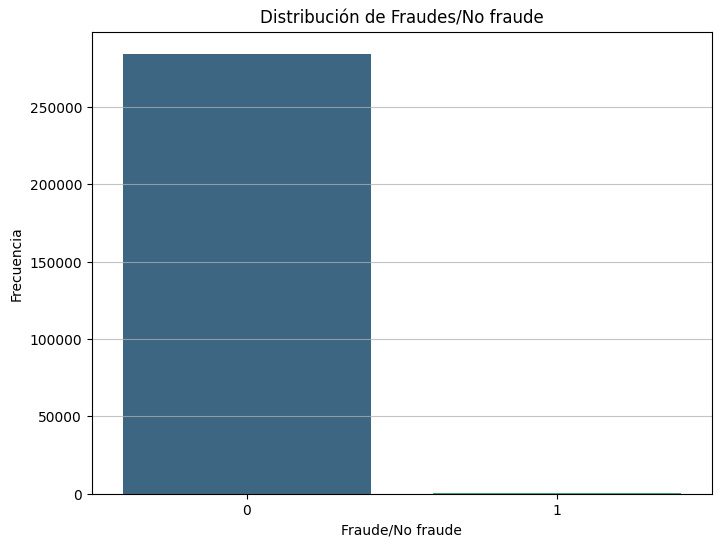

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette='viridis')
plt.title('Distribución de Fraudes/No fraude')
plt.xlabel('Fraude/No fraude')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

Como podemos notar es muy evidente el desbalanceo de clases y como los fraudes son muy pocos en frecuencia haremos un balanceo de clases creando datos sintéticos dentro de los modelos.

## **Modelo 4.1: Logistic Regression**

Sin reducciones t-SNE y UMAP:

In [ ]:
smote = SMOTETomek(random_state=42)

In [ ]:
pipe_log_reg_bal = ImbPipeline([
    ('smote', smote),
    ('scaler', StandardScaler()),
    ('logi_reg_smote', LogisticRegression(
        random_state=42,
        max_iter=100,
        solver='saga',
        penalty='l1',
        C=0.1,
        class_weight='balanced'
    ))
])

Procedemos con el entrenamiento.

In [ ]:
pipe_log_reg_bal.fit(X_tr, y_tr)

Pipeline(steps=[('smote', SMOTETomek(random_state=42)),
                ('scaler', StandardScaler()),
                ('logi_reg_smote',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    penalty='l1', random_state=42,
                                    solver='saga'))])

Seguimos con la predicción y evaluación de esta.

In [ ]:
y_pred_log_reg_bal = pipe_log_reg_bal.predict(X_te)

print(confusion_matrix(y_te, y_pred_log_reg_bal))
print(classification_report(y_te, y_pred_log_reg_bal))

[[55856  1008]
 [   10    88]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.90      0.15        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962



Con reducción t-SNE:

In [ ]:
pipe_log_reg_bal_tsne = Pipeline([
    ('scaler', StandardScaler()),
    ('tsne', TSNE(n_components=2,
                  random_state=42,
                  n_iter = 500,
                  method = 'barnes_hut',
                  init = 'pca'
                  )),
    ('logi_reg_smote', LogisticRegression(
        random_state=42,
        max_iter=1000,
        solver='liblinear',
        penalty='l1',
        C=0.1,
        class_weight='balanced'
    ))
])

In [ ]:
X_tr = StandardScaler().fit_transform(X_tr)

In [ ]:
X_tr_res, y_tr_res = smote.fit_resample(X_tr, y_tr)

X_tr = X_tr_res
y_tr = y_tr_res

In [ ]:
X_tr.shape

(227845, 29)

Entrenamiento

In [ ]:
pipe_log_reg_bal_tsne.fit(X_tr, y_tr)

TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'TSNE(n_iter=500, random_state=42)' (type <class 'sklearn.manifold._t_sne.TSNE'>) doesn't

In [ ]:
y_pred_log_reg_bal_tsne = pipe_log_reg_bal_tsne.predict(X_te)

print(confusion_matrix(y_te, y_pred_log_reg_bal_tsne))
print(classification_report(y_te, y_pred_log_reg_bal_tsne))

Con reducción UMAP

In [ ]:
pipe_log_reg_bal_umap = Pipeline([
    ('scaler', StandardScaler()),
    ('umap', umap.UMAP(n_components=2, random_state=42)),
    ('logi_reg_smote', LogisticRegression(
        random_state=42,
        max_iter=1000,
        solver='liblinear',
        penalty='l1',
        C=0,
        class_weight='balanced'
    ))
])

Entrenamiento

In [ ]:
pipe_log_reg_bal_umap.fit(X_tr, y_tr)

Prediccion

In [ ]:
y_pred_log_reg_bal_umap = pipe_log_reg_bal_umap.predict(X_te)

print(confusion_matrix(y_te, y_pred_log_reg_bal_umap))
print(classification_report(y_te, y_pred_log_reg_bal_umap))

## **Modelo 4.2: Random Forest**

Sin reducciones t-SNE y UMAP

In [ ]:
pipe_rf_bal = ImbPipeline([
    ('smote', smote),
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        class_weight='balanced',
        max_depth=3
    ))
])

Entrenamiento

In [ ]:
pipe_rf_bal.fit(X_tr, y_tr)

Predicción

In [ ]:
y_pred_rf_bal = pipe_rf_bal.predict(X_te)

print(confusion_matrix(y_te, y_pred_rf_bal))
print(classification_report(y_te, y_pred_rf_bal))

Con reducción t-SNE

In [ ]:
pipe_rf_bal_tsne = Pipeline([
    ('scaler', StandardScaler()),
    ('tsne', TSNE(n_components=2, random_state=42)),
    ('rf', RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        class_weight='balanced',
        max_depth=3
    ))
])

Entrenamiento

In [ ]:
pipe_rf_bal_tsne.fit(X_tr, y_tr)

Predicción

In [ ]:
y_pred_rf_bal_tsne = pipe_rf_bal_tsne.predict(X_te)

print(confusion_matrix(y_te, y_pred_rf_bal_tsne))
print(classification_report(y_te, y_pred_rf_bal_tsne))

Con reducción UMAP:

In [ ]:
pipe_rf_bal_umap = Pipeline([
    ('scaler', StandardScaler()),
    ('umap', umap.UMAP(n_components=2, random_state=42)),
    ('rf', RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        class_weight='balanced',
        max_depth=3
    ))
])

Entrenamiento

In [ ]:
pipe_rf_bal_umap.fit(X_tr, y_tr)

Predicción

In [ ]:
y_pred_rf_bal_umap = pipe_rf_bal_umap.predict(X_te)

print(confusion_matrix(y_te, y_pred_rf_bal_umap))
print(classification_report(y_te, y_pred_rf_bal_umap))

# **Ejercicio 5: Energy Efficiency**

El objetivo del tercer ejercicio es aplicar los modelos supervisados Linear Regresion (Ridge) y Random Forest con y sin PCA para comparar sus rendimientos y utilidades.

Partamos cargando todas las librerías necesarias para los modelos y el dataset correspondiente.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df5 = pd.read_csv(path5 + '/energy_efficiency_data.csv')

Ahora procedemos a hacer la separación de los datos entre datos de entrenamiento y datos de testeo. A la variable X le entregamos las características y a y le damos la variables objetivo.

In [ ]:
X = df5.drop(columns=['Heating_Load','Cooling_Load'])
y = df5[['Heating_Load','Cooling_Load']]

Procedamos a hacer el split de las variables

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

Definamos las métricas para evaluar las predicciones

In [ ]:
def rmse(a,b): return np.sqrt(mean_squared_error(a,b))

## **Modelo 5.1: Linear Regression**

Sin reducción PCA:

In [ ]:
lin = Pipeline([("scaler",StandardScaler()),("lr",LinearRegression())])
lin.fit(X_tr,y_tr)
pred = lin.predict(X_te)

def rmse(a,b): return np.sqrt(mean_squared_error(a,b))
print("MAE :", mean_absolute_error(y_te,pred))
print("RMSE:", rmse(y_te,pred))
print("R²  :", r2_score(y_te,pred))

MAE : 2.1886711163218973
RMSE: 3.085985701777215
R²  : 0.90270481100771


Con reducción PCA:

In [ ]:
lin = Pipeline([("scaler",StandardScaler()),('pca',PCA(n_components=2)),("lr",LinearRegression())])
lin.fit(X_tr,y_tr)
pred = lin.predict(X_te)

def rmse(a,b): return np.sqrt(mean_squared_error(a,b))
print("MAE :", mean_absolute_error(y_te,pred))
print("RMSE:", rmse(y_te,pred))
print("R²  :", r2_score(y_te,pred))

MAE : 4.112808763036296
RMSE: 5.439690859862244
R²  : 0.6997654865319418


## **Modelo 5.2: Ridge**

Sin reducción PCA:

In [ ]:
for Model, name in [(Ridge(alpha=0.1), "Ridge 0.1"),
                    (Ridge(alpha=0.01), "Ridge 0.01"),
                    (Ridge(alpha=10.0), "Ridge 10.0")
                    ]:
    mdl = Pipeline([("scaler", StandardScaler()), ("reg", Model)])
    mdl.fit(X_tr, y_tr)
    y_pred = mdl.predict(X_te)
    print(name,
          "MAE:", mean_absolute_error(y_te,y_pred),
          "RMSE:", rmse(y_te,y_pred),
          "R²:",  r2_score(y_te,y_pred))

Ridge 0.1 MAE: 2.188875779478026 RMSE: 3.086619219448549 R²: 0.9026660298509767
Ridge 0.01 MAE: 2.1886860875773344 RMSE: 3.086045379547296 R²: 0.9027011727988634
Ridge 10.0 MAE: 2.249852816144561 RMSE: 3.1825223007799845 R²: 0.8964941962369691


Con reducción PCA:

In [ ]:
for Model, name in [(Ridge(alpha=0.1), "Ridge 0.1"),
                    (Ridge(alpha=0.01), "Ridge 0.01"),
                    (Ridge(alpha=10.0), "Ridge 10.0")
                    ]:
    mdl = Pipeline([("scaler", StandardScaler()),
                    ("pca", PCA(n_components=2)),
                    ("reg", Model)])
    mdl.fit(X_tr, y_tr)
    y_pred = mdl.predict(X_te)
    print(name,
          "MAE:", mean_absolute_error(y_te,y_pred),
          "RMSE:", rmse(y_te,y_pred),
          "R²:",  r2_score(y_te,y_pred))

Ridge 0.1 MAE: 4.112848350595264 RMSE: 5.439709981944648 R²: 0.6997633839672558
Ridge 0.01 MAE: 4.112812722231064 RMSE: 5.439692770493772 R²: 0.6997652764504296
Ridge 10.0 MAE: 4.116858372749518 RMSE: 5.441773529995797 R²: 0.6995363076259553


## **Modelo 5.3: Random Forest**

Sin reducción PCA:

In [ ]:
rf_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("rf",   RandomForestRegressor(
                n_estimators=300,
                max_depth=None,
                random_state=42,
                oob_score=True))
])

Entrenamiento

In [ ]:
rf_pipe.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(n_estimators=300, oob_score=True,
                                       random_state=42))])

Predicción

In [ ]:
y_pred_rf = rf_pipe.predict(X_te)

Métricas

In [ ]:
print("MAE :", mean_absolute_error(y_te,y_pred_rf))
print("RMSE:", rmse(y_te,y_pred_rf))
print("R²  :", r2_score(y_te,y_pred_rf))

MAE : 0.7586557359307313
RMSE: 1.40965991829039
R²  : 0.9786990405943846


Con reducción PCA:

In [ ]:
rf_pipe_pca = Pipeline([
    ("scaler", StandardScaler()),
    ('pca',PCA(n_components=2)),
    ("rf",   RandomForestRegressor(
                n_estimators=300,
                max_depth=None,
                random_state=42,
                oob_score=True))
])

Entrenamiento

In [ ]:
rf_pipe_pca.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('rf',
                 RandomForestRegressor(n_estimators=300, oob_score=True,
                                       random_state=42))])

Predicción

In [ ]:
y_pred_rf_pca = rf_pipe_pca.predict(X_te)

Métricas

In [ ]:
print("MAE :", mean_absolute_error(y_te,y_pred_rf_pca))
print("RMSE:", rmse(y_te,y_pred_rf_pca))
print("R²  :", r2_score(y_te,y_pred_rf_pca))

MAE : 1.161245562770566
RMSE: 1.7280429367187546
R²  : 0.9686829318425514


# **Parte 3: Conclusiones**

## Tabla Comparativa de Modelos - Ejercicio 1 (Fashion MNIST)

| Modelo                      | Reducción | Precision | Recall | F1-score | Accuracy | Tiempo de Ejecución |
|-----------------------------|-----------|-----------------------|--------------------|----------------------|----------|---------------------|
| Logistic Regression         | Sin PCA   | 0.85                  | 0.86               | 0.85                 | 0.86     |                     |
| Logistic Regression         | Con PCA   | 0.85                  | 0.85               | 0.85                 | 0.85     |                     |
| SVM                         | Sin PCA   | 0.86                  | 0.86               | 0.86                 | 0.86     |                     |
| SVM                         | Con PCA   | 0.86                  | 0.86               | 0.86                 | 0.86     |                     |
| k-NN                        | Sin PCA   | 0.86                  | 0.86               | 0.86                 | 0.86     |                     |
| k-NN                        | Con PCA   | 0.87                  | 0.87               | 0.87                 | 0.87     |                     |



## Tabla Comparativa de Modelos - Ejercicio 2 (Human Activity Recognition)

| Modelo                      | Reducción | Precision | Recall | F1-score | Accuracy | Tiempo de Ejecución |
|-----------------------------|-----------|-----------------------|--------------------|----------------------|----------|---------------------|
| Random Forest               | Sin ICA   | 0.98                  | 0.98               | 0.98                 | 0.98     |                     |
| Random Forest               | Con ICA   | 0.80                  | 0.79               | 0.79                 | 0.80     |                     |
| k-NN                        | Sin ICA   | 0.90                  | 0.88               | 0.89                 | 0.89     |                     |
| k-NN                        | Con ICA   | 0.75                  | 0.73               | 0.73                 | 0.75     |                     |
| Gradient Boosting (n=300)   | Sin ICA   | 0.99                  | 0.99               | 0.99                 | 0.99     |                     |
| Gradient Boosting (n=100)   | Sin ICA   | 0.99                  | 0.99               | 0.99                 | 0.99     |                     |
| Gradient Boosting           | Con ICA   | 0.79                  | 0.79               | 0.79                 | 0.79     |                     |


## Tabla Comparativa de Modelos - Ejercicio 3 (Wine Quality)

| Modelo              | Reducción | Precision | Recall | F1-score | Accuracy | Tiempo de Ejecución |
|---------------------|-----------|--------------------------|-----------------------|-------------------------|----------|---------------------|
| Logistic Regression | Sin LDA   | 0.48                     | 0.27                  | 0.31                    | 0.27     |                     |
| Logistic Regression | Con LDA   | 0.47                     | 0.22                  | 0.27                    | 0.22     |                     |
| k-NN                | Sin LDA   | 0.55                     | 0.49                  | 0.51                    | 0.49     |                     |
| k-NN                | Con LDA   | 0.48                     | 0.31                  | 0.36                    | 0.31     |                     |


## Tabla Comparativa de Modelos - Ejercicio 5 (Energy Efficiency)

| Modelo                      | Reducción | MAE    | RMSE   | R²     | Tiempo de Ejecución |
|-----------------------------|-----------|--------|--------|--------|---------------------|
| Linear Regression           | Sin PCA   | 2.189  | 3.086  | 0.903  |                     |
| Linear Regression           | Con PCA   | 4.113  | 5.440  | 0.700  |                     |
| Ridge (alpha=0.1)           | Sin PCA   | 2.189  | 3.087  | 0.903  |                     |
| Ridge (alpha=0.01)          | Sin PCA   | 2.189  | 3.086  | 0.903  |                     |
| Ridge (alpha=10.0)          | Sin PCA   | 2.250  | 3.183  | 0.896  |                     |
| Ridge (alpha=0.1)           | Con PCA   | 4.113  | 5.440  | 0.700  |                     |
| Ridge (alpha=0.01)          | Con PCA   | 4.113  | 5.440  | 0.700  |                     |
| Ridge (alpha=10.0)          | Con PCA   | 4.117  | 5.442  | 0.700  |                     |
| Random Forest               | Sin PCA   | 0.759  | 1.410  | 0.979  |                     |
| Random Forest               | Con PCA   | 1.161  | 1.728  | 0.969  |                     |
